In [70]:
import numpy as np

def leapfrog(r, F, v, dt):
    #v is necessary for initialization after that it's not needed as the
    #function stores v_async in between calls
    if v is None:
        raise ValueError("v should be provided!")
    
    #this leapfrog assumes v is out of sync
    v = v + dt * F
    r = r + dt * v
    return r, v

G = 4.49376*10**(-6)
dt = 0.01

r1 = np.zeros(3)
v1 = np.zeros(3)
m1 = 0.48 * 2* 10**8

r2 = np.array([30, 0, 0])
v2 = np.array([-1, 2.5, 0])
m2 = 0.48 * 8 * 10**7

r = np.array([r1, r2])
v = np.array([v1, v2])
m = np.array([m1, m2])

SDR = [np.copy(r)]
for frame in range(1000):
    if frame != 0:
        SDR.append(np.copy(r))
    
    F_BH = []
    for i in range(r.shape[0]):
        #compute the force on supermassive black hole 'i'
        Fg = np.zeros(3)
        for j in range(r.shape[0]):
            if i != j:
                R = r[i] - r[j]
                Fg -= (G * m[j]) * R / (np.linalg.norm(R) ** 2 + 15 ** 2) ** (3 / 2)
        F_BH.append(Fg)

    for i in range(r.shape[0]):
        if frame == 0:
            #kickstart leapfrog for the black holes by moving v half a step forward
            v[i] = v[i] + F_BH[i] * dt / 2 #v_{i+1/2} = v_{i} + a_{i}*Δt/2
            r[i] = r[i] + v[i] * dt #x_{i+1} = x_{i} + v_{i+1/2}*Δt
        else:
            #update location and velocity corresponding to the SMBHS
            # v : v_{i+3/2} = v_{i+1/2} + a_{i+1}*Δt
            # r : x_{i+2} = x_{i+1} + v_{i+3/2}*Δt
            r[i], v[i] = leapfrog(r[i], F_BH[i], v[i], dt)
    del F_BH
    
SDR = np.array(SDR)

<IPython.core.display.Javascript object>


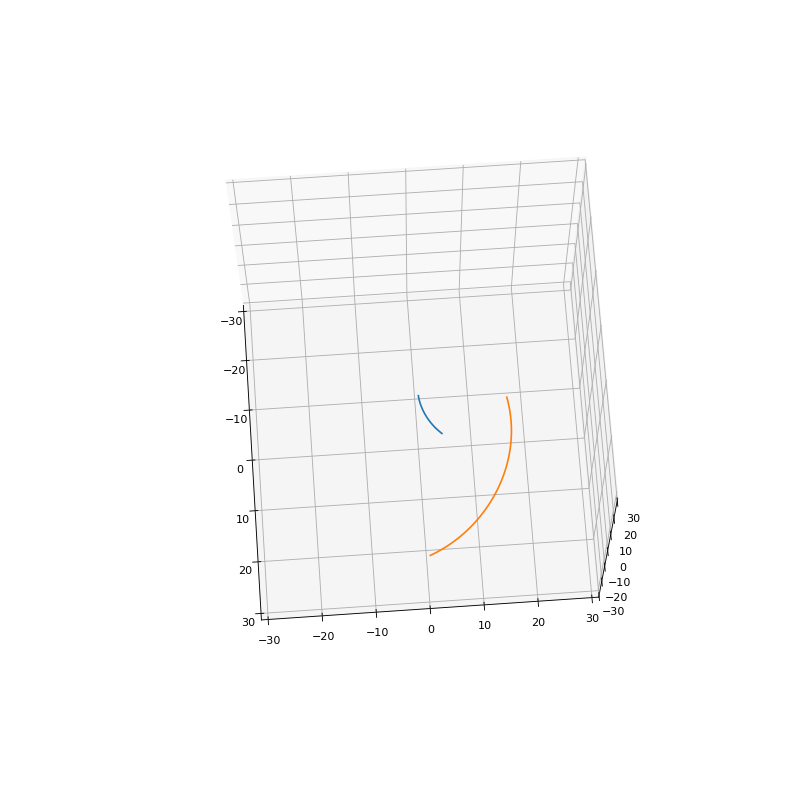

In [71]:
%matplotlib notebook
from matplotlib.pyplot import figure, show
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for i in range(SDR.shape[1]):
    ax.plot3D(*SDR[:,i].T)
ax.set(xlim=(-30,30), ylim=(-30,30), zlim=(-30,30))
show()